### Analicemos la ecuación

### $\frac{dy}{dx} = 0.2xy$

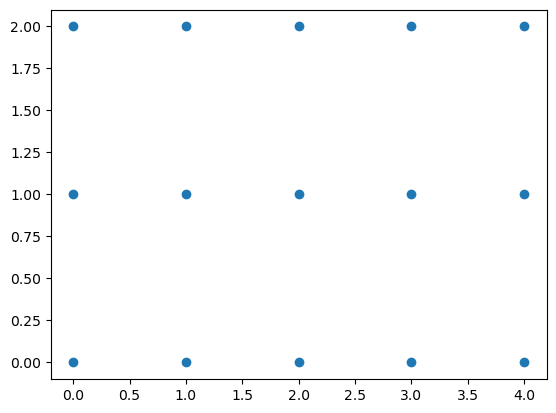

In [2]:
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(0, 5, 1)
y = np.arange(0, 3, 1)
X, Y = np.meshgrid(x, y)
# también se puede usar linespace


# 1. Crear la Figure y los Axes
fig, ax = plt.subplots()

# 2. Usar el método del objeto Axes para hacer el gráfico
ax.scatter(X, Y)






### Hagamos una grilla más densa

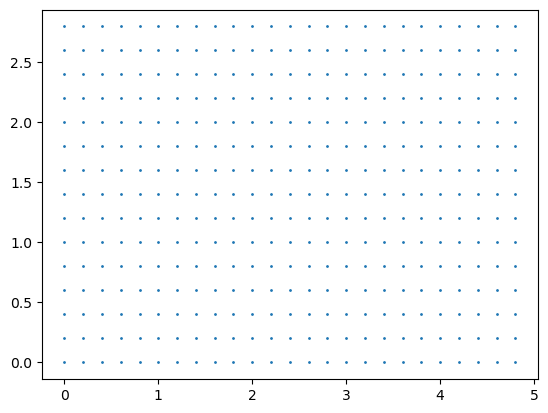

In [3]:
x = np.arange(0, 5, 0.2)
y = np.arange(0, 3, 0.2)
xv, yv = np.meshgrid(x, y)
# también se puede usar linespace


# 1. Crear la Figure y los Axes
fig, ax = plt.subplots()

# 2. Usar el método del objeto Axes para hacer el gráfico
# Usar el parámetro 's' para un tamaño fijo
ax.scatter(xv, yv, s = 1)


### Dibujemos vectores tangentes con [Quiver](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)

**Arrow size**

_The default settings auto-scales the length of the arrows to a reasonable size. To change this behavior see the scale and scale_units parameters._


In [4]:
dy = 0.2*xv*yv
print(dy.shape)

(15, 25)


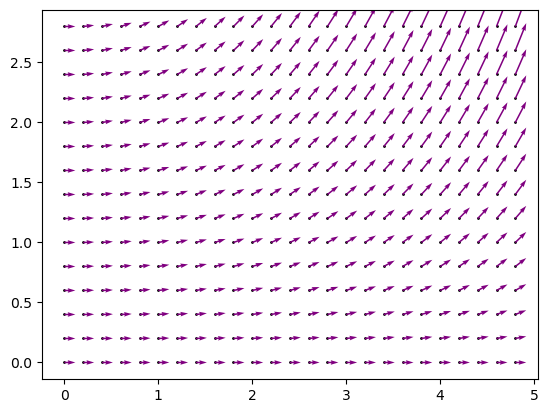

In [5]:
dx = np.ones(dy.shape)

fig, ax = plt.subplots()
ax.scatter(xv,yv,color='k', s =1) 
# ax.grid(True, linestyle='--')
ax.quiver(xv,yv,dx,dy, color='purple')
plt.show()

### Observamos que es estaría bueno NOMRALIZAR LAS FLECHAS

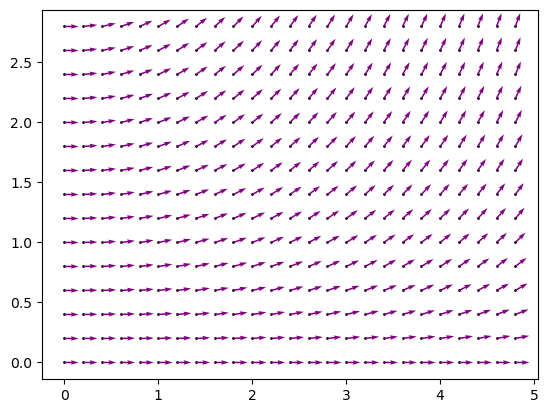

In [6]:

dyu = dy/(np.sqrt(dy**2 + dx**2))
dxu = dx/(np.sqrt(dy**2 + dx**2))

fig, ax = plt.subplots()
ax.scatter(xv,yv,color='k', s =1) 
# ax.grid(True, linestyle='--')
ax.quiver(xv,yv,dxu,dyu, color='purple')
plt.show()

### Ahora hagamos una función que realice esto por nosotros de forma INTELIGENTE.

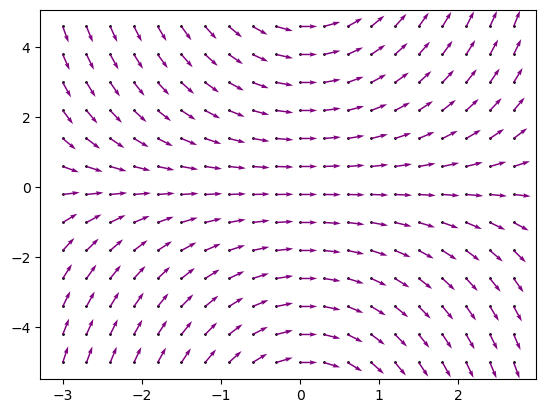

In [14]:
def campo(f, rangox, rangoy, steps):
   """
   PROPÓSITO: Grafica un campo de direcciones para la ecuación diferencial dy/dx = f(y, x) basado en una grilla de (rangox)x(rangoy)  con paso *step*.
   PARÁMETROS: 
      - f
      - rangox. Lista. Un intervalo en forma de lista de 2 elementos indicando el rango de x.
      - rangoy. Lista. Un intervalo en forma de lista de 2 elementos indicando el rango de x.
      -steps. Lista. El paso que se da en cada intervalo cada variable.
   """

   a, b = rangox
   c, d = rangoy
   stepx, stepy = steps 

   x = np.arange(a, b, stepx)
   y = np.arange(c, d, stepy)
   xv,  yv = np.meshgrid(x, y)

   dy = f(xv, yv)
   dx = np.ones(dy.shape)

   # Normalizamos
   dyu = dy/(np.sqrt(dy**2 + dx))
   dxu = dx/(np.sqrt(dy**2 + dx))
   
   fig, ax = plt.subplots()
   ax.scatter(xv,yv,color='k', s =1) 
   ax.quiver(xv,yv,dxu,dyu, color='purple', 
             width=0.003,# Controla el grosor de la flecha
            )
   plt.show()



campo(lambda x, y: 0.2*x*y, [-3, 3], [-5, 5], [0.3, 0.8])
    

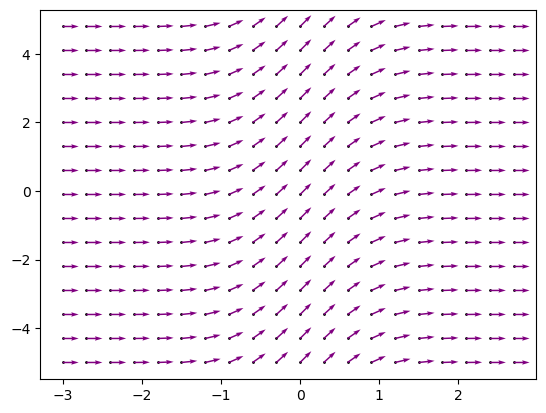

In [8]:
from numpy import exp
campo(lambda x, y: exp(-x**2),[-3, 3], [-5, 5], [0.3, 0.7])

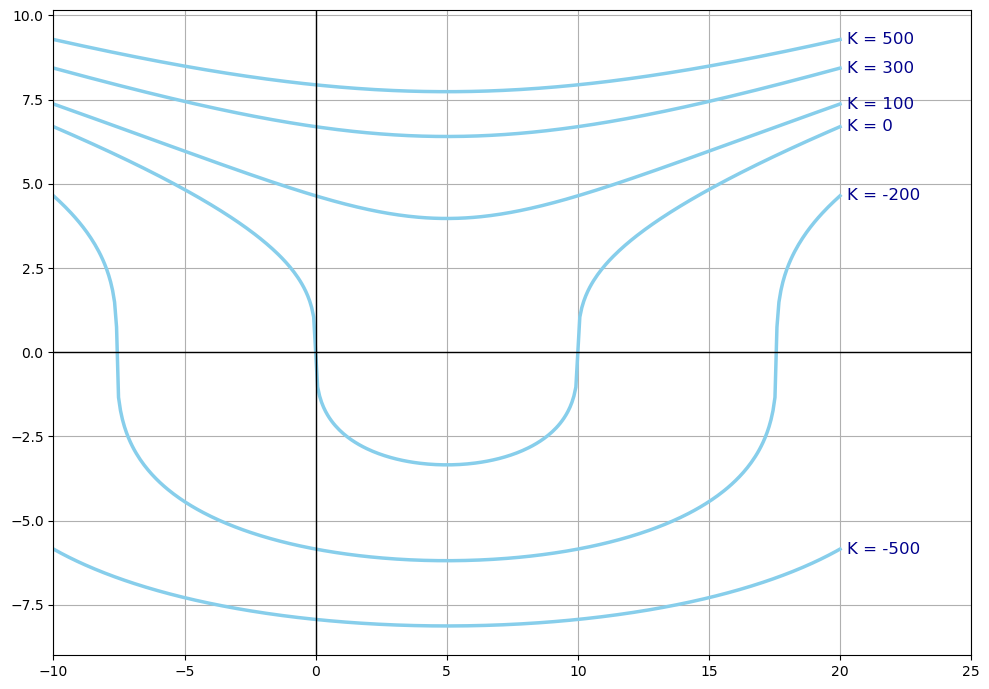

In [9]:
# pag 42 Nagle. Chapter 2


# 1. Definir la función de la solución general usando lambda
solucion_general = lambda x, K: np.cbrt((3 * x**2) / 2 - 15 * x + K)

# 2. Crear un rango de valores para x
x_vals = np.linspace(-10, 20, 400)

# 3. Elegir diferentes valores para la constante K
k_values = [-500, -200, 0, 100, 300, 500]

# 4. Crear la figura y el objeto Axes (sintaxis orientada a objetos)
fig, ax = plt.subplots(figsize=(10, 7))

# 5. Iterar y trazar las curvas
for K in k_values:
    # Calcular los valores de y
    y_vals = solucion_general(x_vals, K)
    # Trazar la curva
    line, = ax.plot(x_vals, y_vals, color='skyblue', linewidth =2.5 )
    
    # 6. Anotar cada línea cerca de su extremo derecho
    x_end = x_vals[-1]  # Usar el último valor de x
    y_end = solucion_general(x_end, K)
    ax.annotate(f'K = {K}', xy=(x_end, y_end), xytext=(5, 0),
                textcoords='offset points', fontsize=12,
                color='darkblue', ha='left', va='center')

# 7. Agregar títulos, etiquetas y otros elementos al objeto Axes

ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.grid(True)

# 8. Ajustar los límites del gráfico para que las etiquetas quepan
ax.set_xlim(x_vals.min(), x_vals.max() + 5)

# 9. Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Euler 

## Ejemplo 1 

ch 2.6 Zill - A first course in differential equations

### Considere el problema de valor inicial $y' = 0.1\sqrt{y} + 0.4x^2$, $y(2) = 4$. Use el método de Euler para obtener una aproximación de $y(2.5)$ usando primero $h = 0.1$ y luego $h = 0.05$.

In [ ]:
from math import sqrt

fxy = lambda x, y: 0.1*sqrt(y) + 0.4*x**2

def Euler(f, h, rango_variable_independiente, y0):
   """
   PROPÓSITO:
   
   """
   x0, xf = rango_variable_independiente
   x = np.arange(x0 , xf, h)
   
   for x0 in x:
      print(x0, y0)
      y0 = y0 + h*f(x0, y0)
   return y0

Euler(fxy, 0.1, [2, 2.6], 4)




2.0 4
2.1 4.18
2.2 4.376845048300261
2.3000000000000003 4.591365959007733
2.4000000000000004 4.824393431931547
2.5000000000000004 5.076757933819666
2.6000000000000005 5.349289595839632


np.float64(5.642818127128582)

In [11]:
import pandas as pd
def Euler_pandas(f, h, rango_variable_independiente, y0):
   x0, xf = rango_variable_independiente
   x = np.arange(x0 , xf, h)
   y =[y0]
   for x0 in x:
      y0 = y0 + h*f(x0, y0)
      y.append(y0)
   

   print(len(x), len(y))
  
   y = y[:-1]
   df = pd.DataFrame({'x': x, 'y': y})
   
   
   return df

Euler_pandas(fxy, 0.1, [2, 2.6], 4)

7 8


,x,y
0,2.0,4.000000
1,2.1,4.180000
2,2.2,4.376845
3,2.3,4.591366
4,2.4,4.824393
5,2.5,5.076758
6,2.6,5.349290


In [12]:
Euler_pandas(fxy, 0.05, [2, 2.51], 4)

11 12


,x,y
0,2.00,4.000000
1,2.05,4.090000
2,2.10,4.184162
3,2.15,4.282589
4,2.20,4.385387
5,2.25,4.492657
6,2.30,4.604505
7,2.35,4.721034
8,2.40,4.842348
9,2.45,4.968551
